In [1]:


# Imports
import collections
import os
import tarfile

from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tqdm

from waymo_open_dataset.protos import scenario_pb2
from waymo_open_dataset.protos import sim_agents_submission_pb2
from waymo_open_dataset.utils import trajectory_utils
from waymo_open_dataset.utils.sim_agents import submission_specs
from waymo_open_dataset.utils.sim_agents import visualizations
from waymo_open_dataset.wdl_limited.sim_agents_metrics import metric_features
from waymo_open_dataset.wdl_limited.sim_agents_metrics import metrics

# Set matplotlib to jshtml so animations work with colab.
rc('animation', html='jshtml')
     


2025-06-02 00:03:46.158134: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 00:03:46.220069: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 00:03:46.221196: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-02 00:03:47.120454: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
DATASET_FOLDER = '/files/waymo/scenario'

TRAIN_FILES = os.path.join(DATASET_FOLDER+"/training", 'training.tfrecord*')
VALIDATION_FILES = os.path.join(DATASET_FOLDER+"/validation", 'validation.tfrecord*')
TEST_FILES = os.path.join(DATASET_FOLDER+"/test", 'test.tfrecord*')

In [3]:

# Define the dataset from the TFRecords.
filenames = tf.io.matching_files(VALIDATION_FILES)
dataset = tf.data.TFRecordDataset(filenames)
# Since these are raw Scenario protos, we need to parse them in eager mode.
dataset_iterator = dataset.as_numpy_iterator()

2025-06-02 00:03:49.556429: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
#look at test set 
test_filenames = tf.io.matching_files(TEST_FILES)
test_dataset = tf.data.TFRecordDataset(test_filenames)
# Since these are raw Scenario protos, we need to parse them in eager mode.
test_dataset_iterator = dataset.as_numpy_iterator()

In [5]:
test_example = next(test_dataset_iterator)
scenario = scenario_pb2.Scenario.FromString(test_example)

In [6]:
scenario.tracks

[id: 1807
object_type: TYPE_VEHICLE
states {
  center_x: 3578.34912109375
  center_y: 4986.5380859375
  center_z: 31.326579674761483
  length: 4.7639122
  width: 2.04944634
  height: 1.69186401
  heading: -1.52083135
  velocity_x: 1.08642578
  velocity_y: -21.40625
  valid: true
}
states {
  center_x: 3578.459716796875
  center_y: 4984.412109375
  center_z: 31.339470357504769
  length: 4.77193308
  width: 2.05243587
  height: 1.72802091
  heading: -1.51862705
  velocity_x: 1.10595703
  velocity_y: -21.2597656
  valid: true
}
states {
  center_x: 3578.583740234375
  center_y: 4982.27685546875
  center_z: 31.341770566725593
  length: 4.76781368
  width: 2.05101156
  height: 1.73264825
  heading: -1.51547766
  velocity_x: 1.24023438
  velocity_y: -21.3525391
  valid: true
}
states {
  center_x: 3578.70751953125
  center_y: 4980.15673828125
  center_z: 31.329815372574952
  length: 4.76788568
  width: 2.0505867
  height: 1.69899678
  heading: -1.51270258
  velocity_x: 1.23779297
  velocity_

In [7]:
bytes_example = next(dataset_iterator)
scenario = scenario_pb2.Scenario.FromString(bytes_example)
print(f'Checking type: {type(scenario)}')
print(f'Loaded scenario with ID: {scenario.scenario_id}')

Checking type: <class 'waymo_open_dataset.protos.scenario_pb2.Scenario'>
Loaded scenario with ID: b85e1bd6cc8e74c0


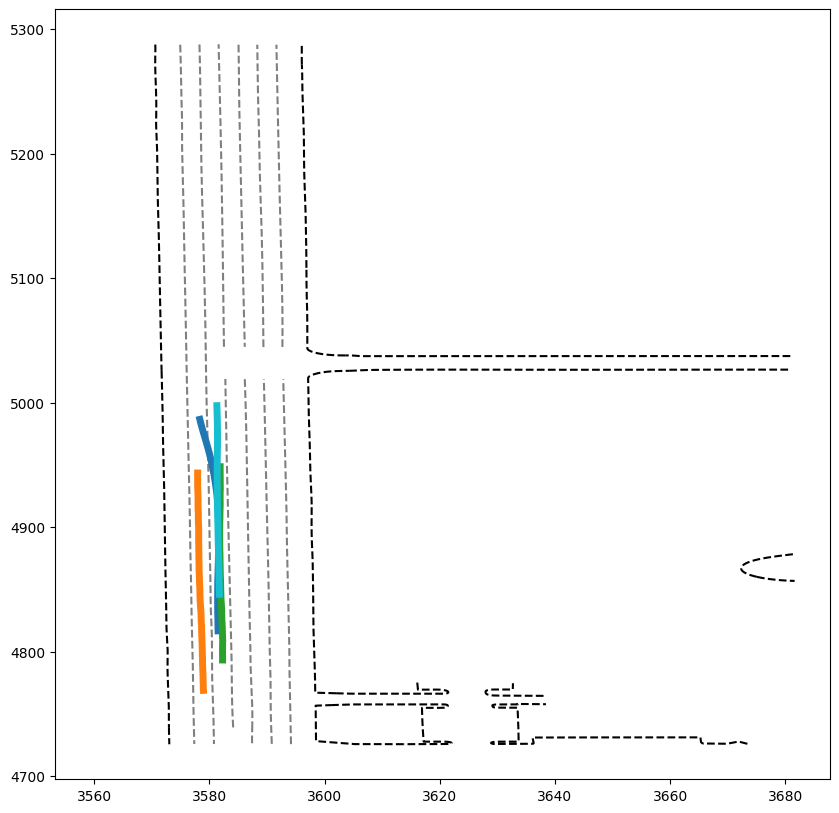

In [8]:



     

# Visualize the reference (ground truth) scenario.


def plot_track_trajectory(track: scenario_pb2.Track) -> None:
  valids = np.array([state.valid for state in track.states])
  if np.any(valids):
    x = np.array([state.center_x for state in track.states])
    y = np.array([state.center_y for state in track.states])
    ax.plot(x[valids], y[valids], linewidth=5)


# Plot their tracks.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
visualizations.add_map(ax, scenario)

for track in scenario.tracks:
  if track.id in submission_specs.get_sim_agent_ids(
      scenario, challenge_type=submission_specs.ChallengeType.SCENARIO_GEN
  ):
    plot_track_trajectory(track)

plt.show()
     
